# File Mount

In [ ]:
# connect to your google drive
from google.colab import drive
drive.mount('/content/drive')
#執行程式碼後，可以在左側看到自己的雲端硬碟內容

Mounted at /content/drive


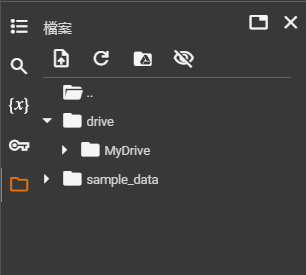

In [ ]:
# change current path to a certain path(folder) in your drive.
# this folder may contain a image to be use in your homework.
# 從mydrive之後要填的是你在雲端硬碟中儲存照片的資料夾
import os
os.chdir('/content/drive/MyDrive/電腦視覺作業')

# Digital image

### Color Image

Color | RGB value   |
-------|:------------------|
Red  | 255, 0, 0   |
Orange | 255, 128, 0  |
Pink  | 255, 153, 255 |


### OpenCV imread
retval	=	cv.imread(	filename[, flags]	)

* In the case of color images, the decoded images will $\color{red}{have\;the\; channels\;stored\;in\;B\;G\;R\;order.}$

* To learn more about [cv.imread()](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)


### matplotlib.pyplot.imshow
matplotlib.pyplot.imshow(X, **cmap**=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)

* (M, N, 3): an image with RGB values ($\color{blue}{0～1\;float}$ or $\color{red}{0～255\;int}$).

* (M, N, 4): an image with RGBA values ($\color{blue}{0～1\;float}$ or $\color{red}{0～255\;int}$),  i.e. including transparency

* To learn more about [matplotlib.pyplot.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

![image.png](https://i.imgur.com/Sl4fkuJ.png)



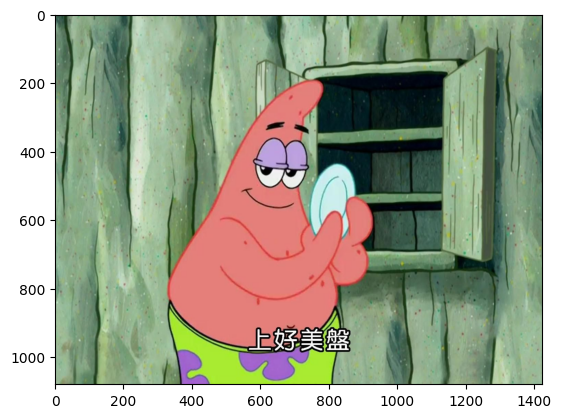

In [ ]:
from  matplotlib import pyplot as plt
import cv2
import numpy as np

image = cv2.imread("test.jpg") # the decoded images will have the channels stored in B G R order.

# change the image matrix into R G B order.
# method 1
# b,g,r = cv2.split(im)
# image = cv2.merge([r,g,b])

# method 2
image = image[:,:,::-1]

# show the image
plt.imshow(image)
plt.show()

In [ ]:
print('image shape: ', image.shape) # show the image's shape(dimention).
print('pixel space in position (100, 150): ', image[100,150]) # one pixel color space.

image shape:  (1080, 1424, 3)
pixel space in position (100, 150):  [ 81 117 103]


In [ ]:
print('image type: ', image.dtype) # show the format in which the image is stored.

image type:  uint8


# 7 image point processing

At 2. introduction to Computer Vision (p.7) <br>
In this section, use the RGB image matrix you create above to finish the jobs.

![image.png](https://i.imgur.com/D2amXGP.jpg)

## 完成以下七題






### 1. Invert

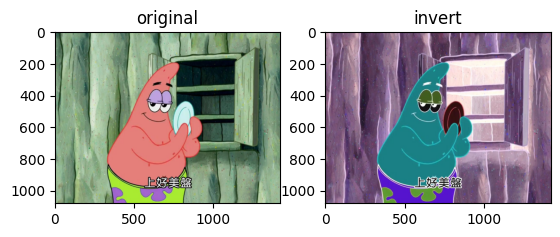

In [ ]:
# image invert #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #




### 2. Darken

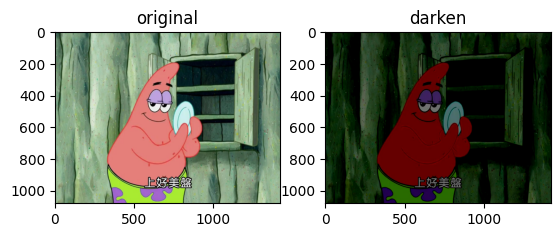

In [ ]:
# image datken #
# you must plot both the original image and the modefied image as the result.
# 需截斷超出範圍的值
# -------- To do ------------- #


### 3. Raise Lighten

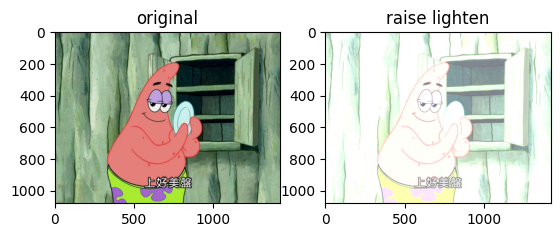

In [ ]:
# image lighten #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #



### 4. Lower Contrast

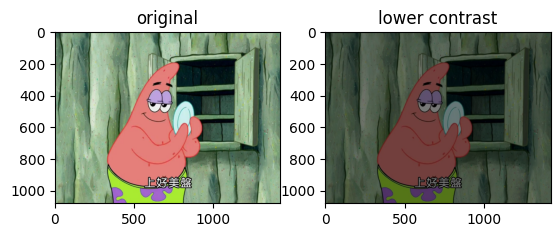

In [ ]:
# image Lower Contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #



### 5. Raise Contrast

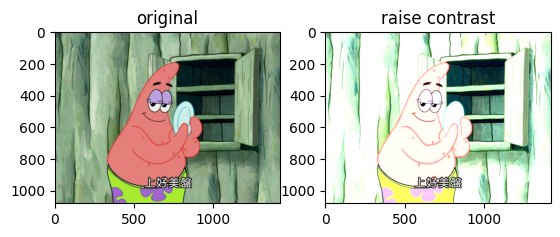

In [ ]:
# image raise contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #


### 6. Non-linear Lower Contrast

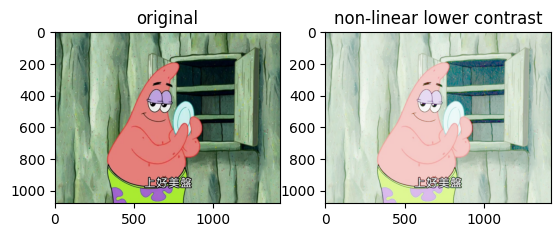

In [ ]:
# Non-linear lower contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #


### 7. Non-linear Raise Contrast

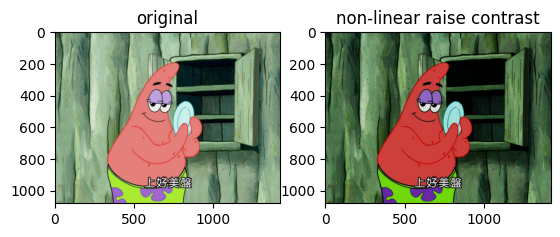

In [ ]:
# Non-linear raise contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #



## Result

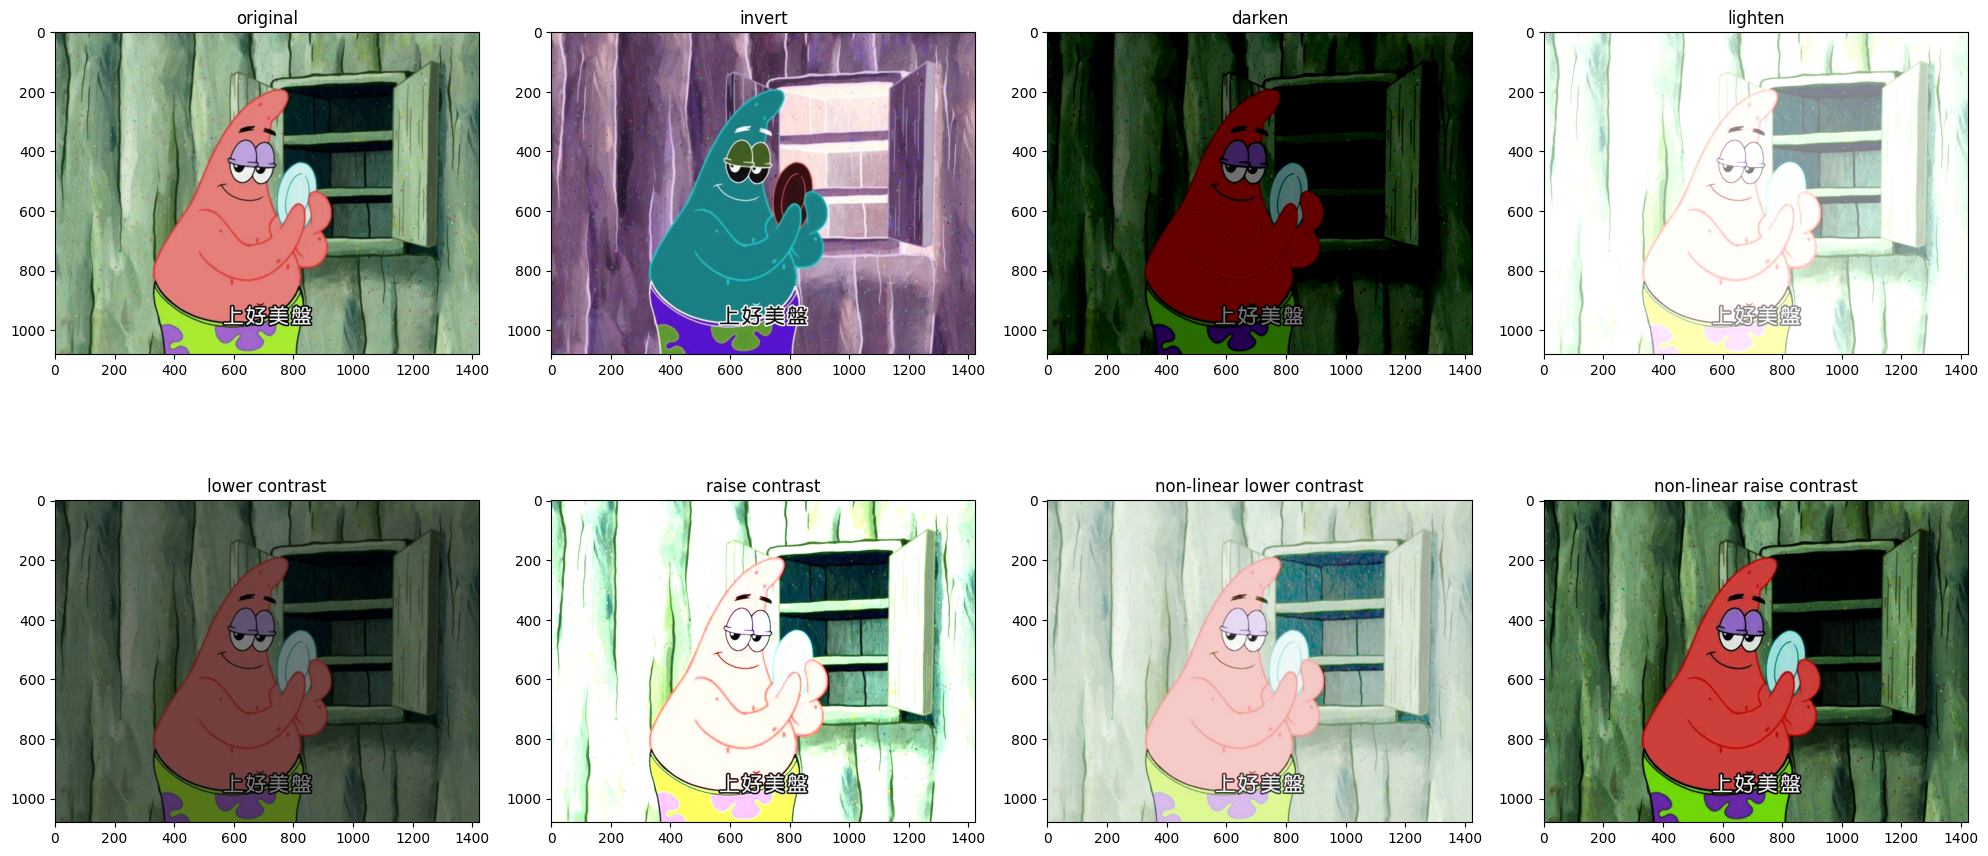

In [ ]:
# plot all the point processing image #
plt.figure(figsize=(20,10))
# -------------- To do ----------------- #

# Filtering an Image
### Opencv Library
First, we use a package to show how gaussian filters change your original image.

filter with original, image shape: (389, 342, 3)
filter with 3*3 kernel, image shape: (389, 342, 3)
filter with 5*5 kernel, image shape: (389, 342, 3)
filter with 7*7 kernel, image shape: (389, 342, 3)


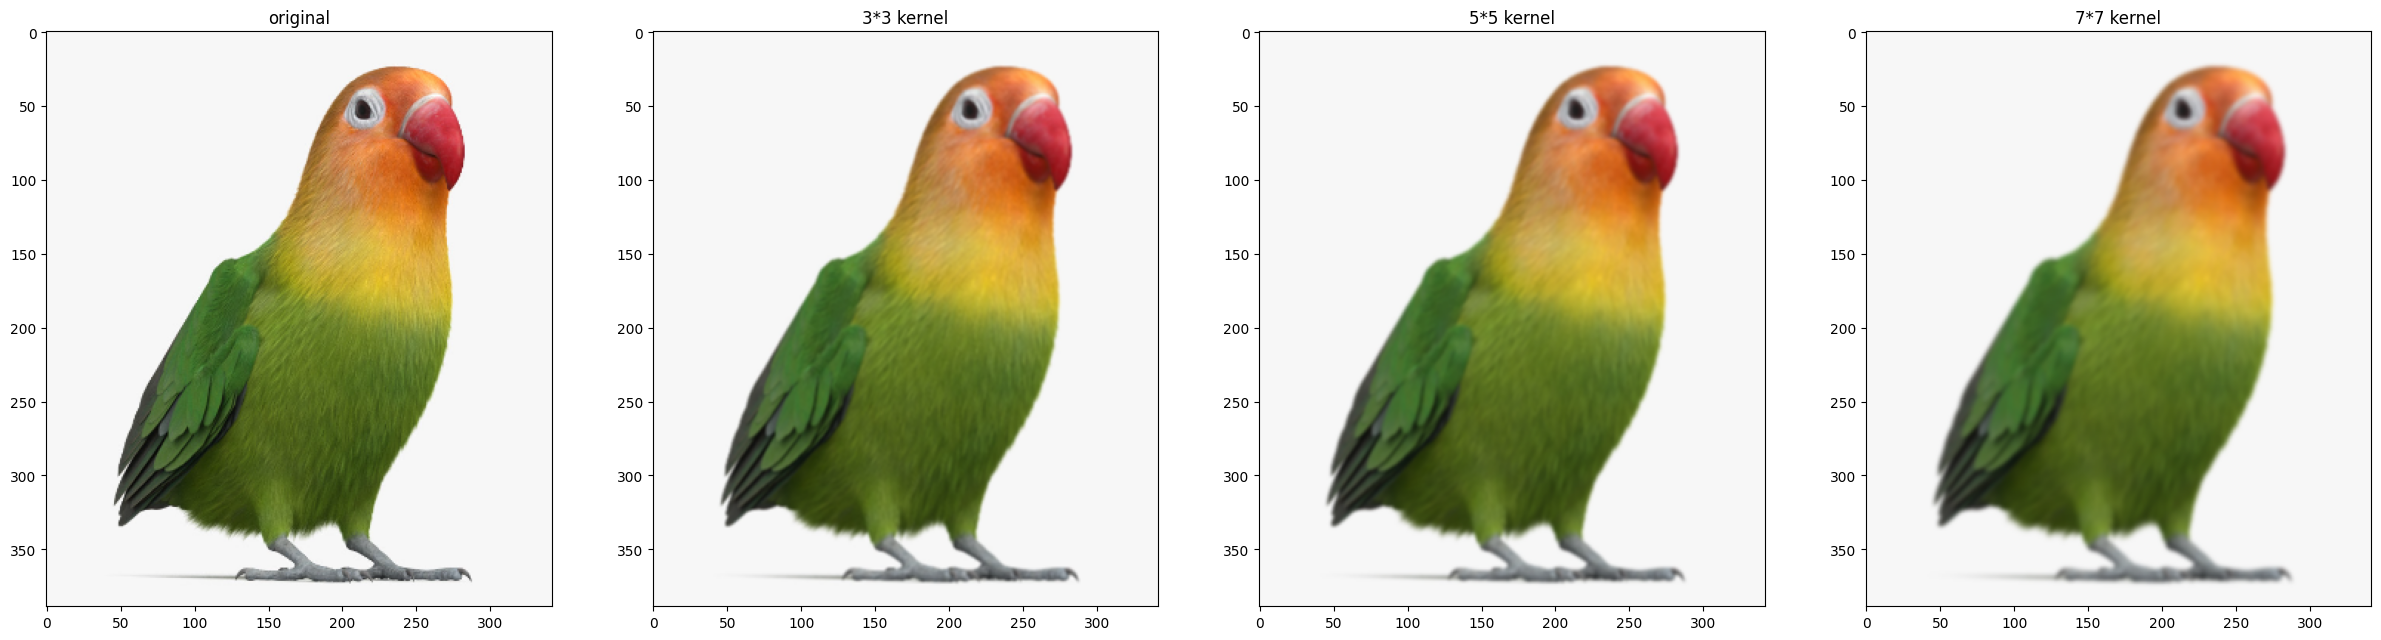

In [ ]:
import cv2
image = cv2.imread("test2.png")
image = image[:,:,::-1]


image_list = []
image_list.append(image)
image_list.append(cv2.GaussianBlur(image,(3,3),0))
image_list.append(cv2.GaussianBlur(image,(5,5),0))
image_list.append(cv2.GaussianBlur(image,(7,7),0))
title_list = []
title_list.append('original')
title_list.append('3*3 kernel')
title_list.append('5*5 kernel')
title_list.append('7*7 kernel')

fig = plt.figure(figsize=(30,60))
for im,ss,i in zip(image_list,title_list,range(0, 4)):
  plt.subplot(1,4,i+1)
  plt.imshow(im)
  plt.title(ss)
  print('filter with {}, image shape: {}'.format(ss, im.shape))
plt.show()



## Step 1 : Get gaussian filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

In [ ]:
# define a function that could return a gaussian kernel based on "KernelSize" variable input.

import math
import numpy as np
def GaussianKernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize):
          #高斯函數公式
          # -------------- To do ----------------- #






          #-------------------------------------------- #
      Gaussian+= [Filter_list]
  #print(Gaussia)
  return np.array(Gaussian)/total

KernelSize = 7 # use kernel size 7 in this section
Gaussian_Kernel=GaussianKernel(KernelSize)

# you should print the sum of the filter and the kernel itself as the result of this cell
#輸出的結果會顯示濾波器的總和，這裡的總和應該是 1，這表示正規化過程是成功的
print('Sum of the filter: ',np.sum(Gaussian_Kernel))
#內核的矩陣則顯示具體的高斯核值，矩陣中間的值較大，邊緣的值較小，符合高斯分佈的特性
print('filter: \n', Gaussian_Kernel)

Sum of the filter:  0.9999999999999998
filter: 
 [[0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00835139 0.02990239 0.06427974 0.082959   0.06427974 0.02990239
  0.00835139]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]]


## Step 2 : Padding

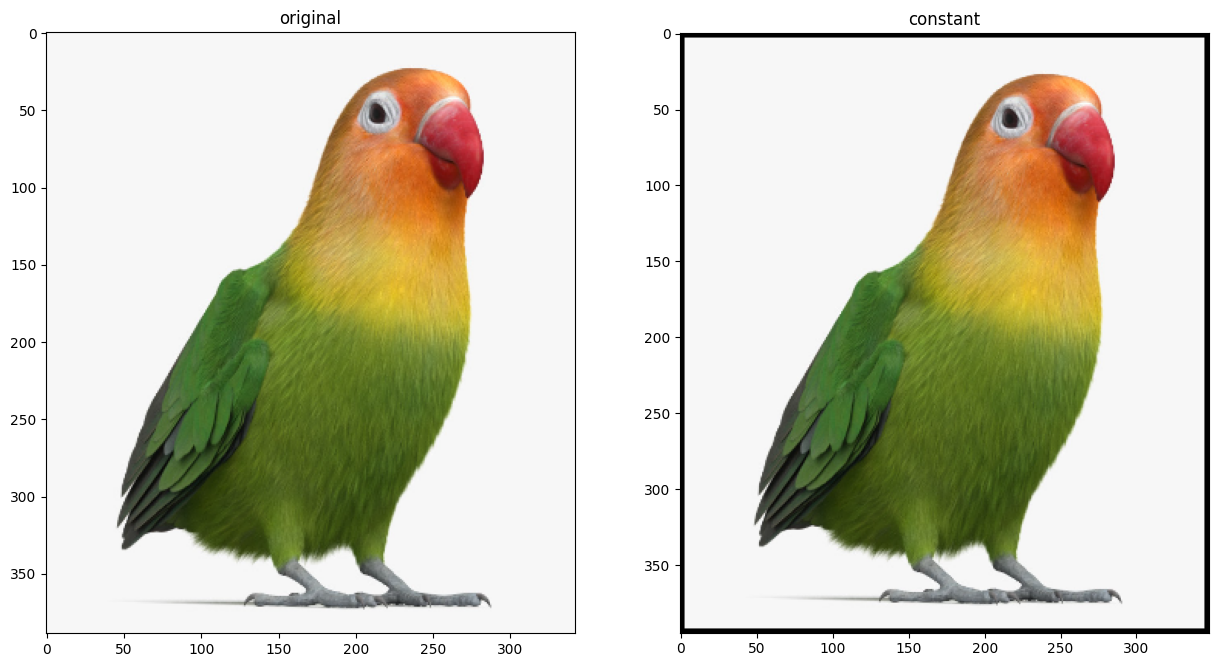

original: (389, 342, 3) 
constant: (395, 348, 3)


In [ ]:
# 做convolution會因為filter大小導致圖片往內縮三格（kernelsize=7）
# 避免邊界處理問題： 許多影像處理操作，特別是卷積和濾波等操作，都涉及到取像素周圍的鄰域。在圖片的邊界處，這些操作可能會超出圖片範圍，這樣的情況下，需要一些策略來處理。填充可以在圖片周圍加上額外的像素，這樣在操作時就不會越界。
# 保持影像大小： 在某些場合，我們需要保持影像的大小，即使進行了一些處理。例如，在進行卷積運算時，如果不填充，那麼卷積後的影像尺寸會縮小。填充可以確保卷積後的影像大小和原始影像相同。
from matplotlib import pyplot as plt
# define a function that could return a image matrix with zero-padding based on the input "img" and "p_size".
def padding_img(img,p_size,style='constant'): # p_size: 填充的大小，即在圖像的周圍添加的零值像素
  # -------------- To do ----------------- #

  # 創建全零的新數組 res：在輸入圖像的每個維度上增加 p_size*2 個單位，儲存填充後的圖像

  # 將原始圖像被放置在新數組中央，周圍被零填充(style='constant')
  return res


# you should plot the original image, the padding image and their shape.
# -------------- To do ----------------- #



## Step 3 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

In [ ]:
# define a function that does the convlution operation with the input image matrix and input kernel matrix.

def Convolution(image, Kernel):
  row, col, depth = image.shape  # 輸入圖像的行數、列數、深度
  resx=np.zeros((row,col,3)) # 創建一個全零的結果圖，形狀與輸入圖像相同，但每個位置有3個通道（RGB）
  padimg = padding_img(image,(KernelSize-1)//2) # 輸入圖像進行零填充，以便卷積核在圖像邊緣能夠正確應用

  # -------------- To do ----------------- #

        #圖像的每一行(for)
        #圖像的每一列(for)
        #卷積核的每一行(for)
        #卷積核的每一列(for)
        #將零填充後的圖像與卷積核進行相乘，並累加到結果矩陣的對應位置
        #padimg[x + i][y + j] 是被卷積的圖像區域，Kernel[i][j] 是卷積核的對應值
  resx = np.clip(resx, 0, 255) # 將卷積結果得像素值限制在0到255間
  return resx

resx = Convolution(image, Gaussian_Kernel) # we get a result matrix here.
print('Convolution Finished!')

Convolution Finished!


## Step 4 : Result

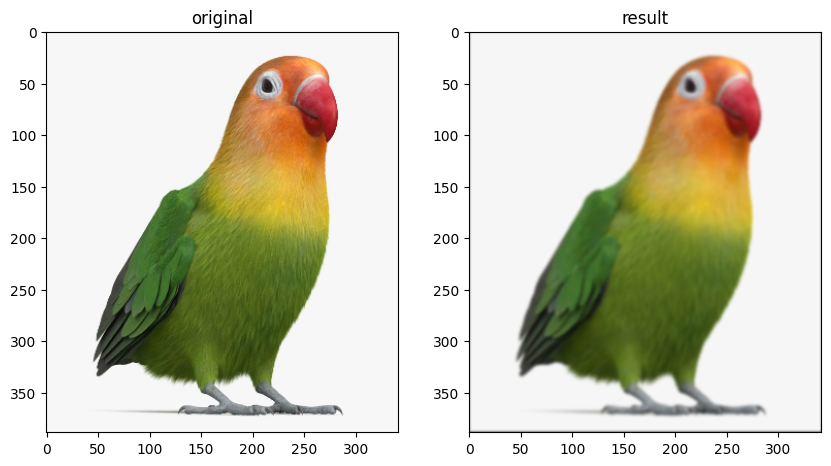

original shape:  (389, 342, 3)
padding shape:  (389, 342, 3)


In [ ]:
# you should plot both the original image and the image after having convlution with the kernel.
# you should print their shape.

# -------------- To do ----------------- #



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'original')

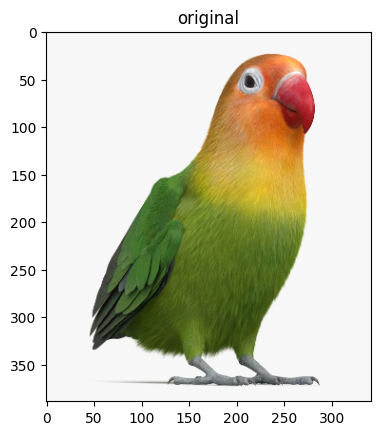

In [ ]:
image = cv2.imread("test2.png")
image = image[:,:,::-1]

plt.imshow(image)
plt.title('original')

## 以下四個 Filter 選擇一項來完成

### Sharpening Filter

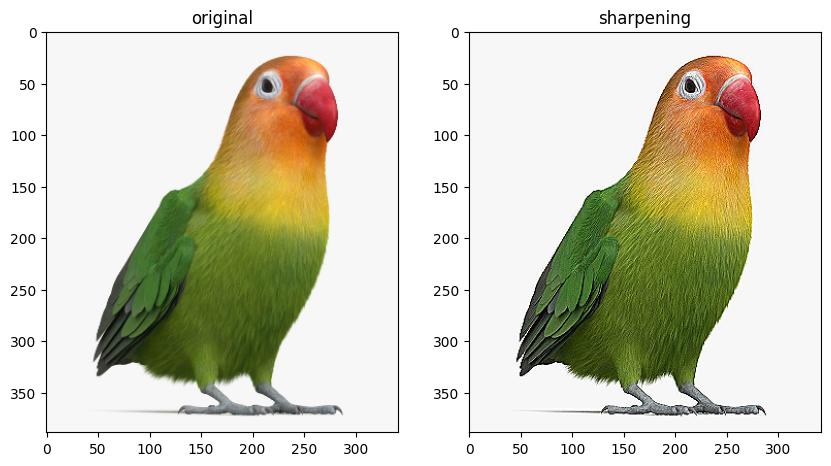

In [ ]:
# you could use the conv function in your previous work.
# use [ 0 -1  0] to sharp your image
#     [-1  5 -1]
#     [ 0 -1  0]

# 銳化濾波器：圖像中的亮度變化會變得更加劇烈，從而使得邊緣和細節更加鮮明
KernelSize = 3

# -------------- To do ----------------- #
def Sharpening(image, KernelSize):
  # 定義銳化濾波器的卷積核

  # 使用銳化濾波器進行圖像處理


# plot the image and shape
# -------------- To do ----------------- #





### Mean Filter

Kernel:
[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


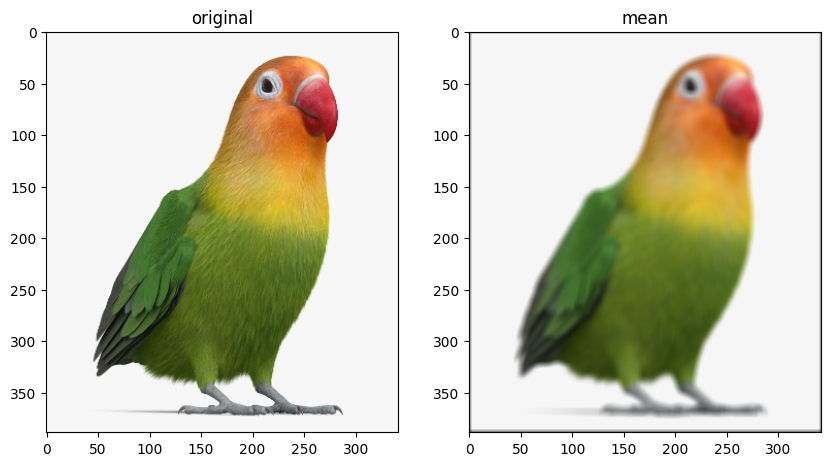

In [ ]:
# you could use the conv function in your previous work.
KernelSize = 7
# 平均濾波器：圖像中每個像素都被其周圍像素的平均值所替代，主要用於平滑圖像

def Mean(image, KernelSize):
  # -------------- To do ----------------- #


# plot the image and shape
# -------------- To do ----------------- #


### Shift Filter

Kernel:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


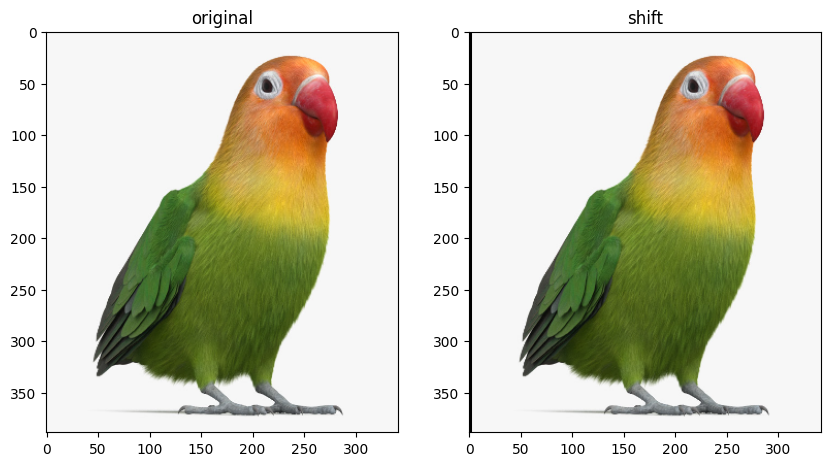

In [ ]:
# you could use the function in your previous work.
KernelSize = 7

def Shift(image, KernelSize):
  # -------------- To do ----------------- #
  # shift right by 1 pixel



# plot the image and shape
# -------------- To do ----------------- #


### Thresholding Filter

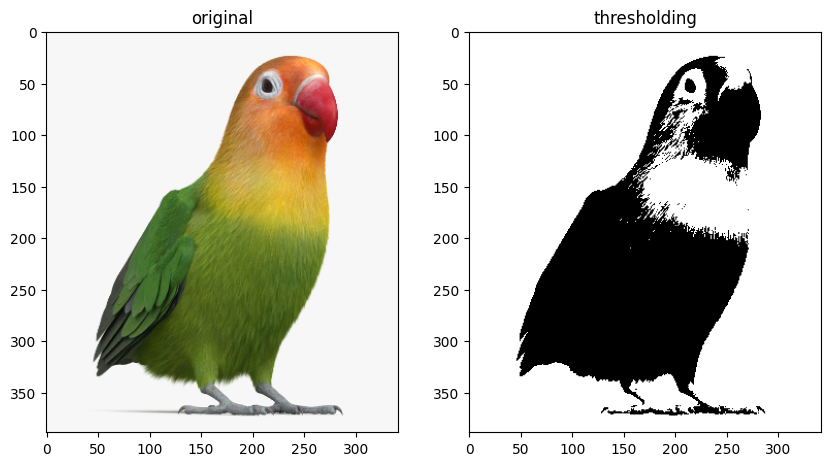

In [ ]:
def Thresholding(img, threshold = 125):
  # -------------- To do ----------------- #
  # cv2.cvtColor() 顏色轉換函數
  # cv2.COLOR_BGR2GRAY 表示將 BGR 轉換為灰度


# plot the image and shape
# -------------- To do ----------------- #



# Downsampling & Upsampling

## Downsampling

![](https://i.imgur.com/0zrrdKy.png)

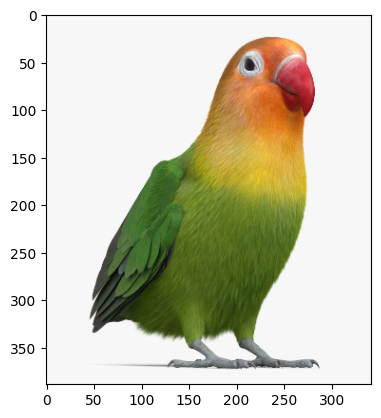

image shape:  (389, 342, 3)


In [ ]:
# read your image here and show it
# you should cover with the image and its shape
img = cv2.imread('test2.png')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.show()
print('image shape: ', img_RGB.shape)

In [ ]:
# define a function that downsample the image with the input image matrix and the scale.
# the function will return a modefied image matrix.

import math
# 降採樣：將圖像的分辨率降低
def DownSamplingFunction(src,samplingScale):
  # plot the image and shape
  # -------------- To do ----------------- #


### Downsampling Without Gaussian Filter

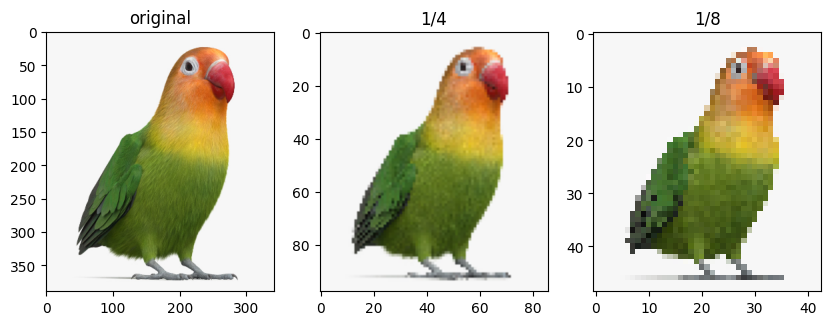

original image: (389, 342, 3)
 1/4 image: (98, 86, 3)
 1/8 image: (49, 43, 3)



In [ ]:
# plot your result with 2 scale, 1/4 and 1/8, also their shape.

# ----------- to do ------------------ #



# plot the image and shape
# -------------- To do ----------------- #


### Downsampling With Gaussian Filter

In [ ]:
## Gaussian
# ----------- to do 1, filtering the image with gaussian ------------------ #
# you could grab the function from your previous work!



# ----------- to do 2, down sampling ------------------ #
# 2 scale, 1/4 and 1/8



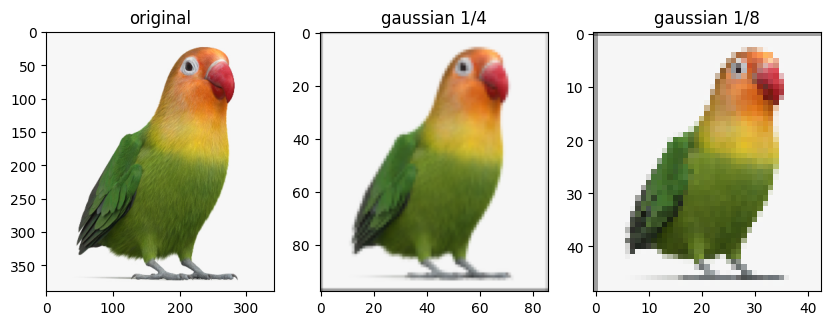

original image: (389, 342, 3)
 gaussian 1/4 image: (98, 86, 3)
 gaussian 1/8 image: (49, 43, 3)



In [ ]:
# ----------- to do 3, plot ------------------ #
#　plot your result and also their shape.


## Upsampling

Chosing the 1/8 downsampling picture for upsampling
using Nearest-neighbor interpolation

In [ ]:
# ---------- to do 1, upsampling ------------ #
# using 1/8 image from previous work, using nearest neightbor method
# 在最近鄰居法中，新像素的值由最接近的原始圖像像素的值決定
# 上採樣是將圖像放大的過程，增加了圖像的尺寸，使得每個像素變大
import math
def UpSamplingFunction(src,samplingScale):
  # plot the image and shape
  # -------------- To do ----------------- #









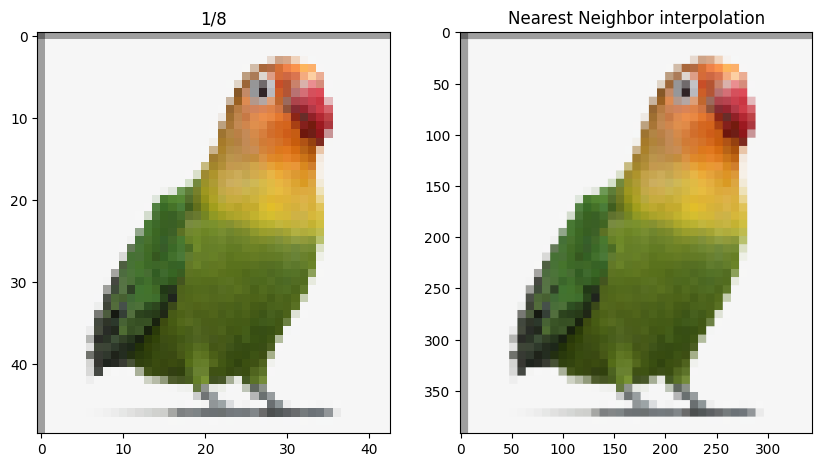

1/8 shape: (49, 43, 3)
upsampling shape: (392, 344, 3)


In [ ]:
# ---------- to do 2, plot ------------ #
# you should cover with the result image and the shape


# Bicubic Interpolation 不用做 參考用
You don't have to do this section. This is just a appendix.
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

In [ ]:
def padding_img(img,k_size,style='edge'): # 使用邊緣值填充
  # ------------ To do ------------- #
  row, col, channel = img.shape
  res = np.zeros((row + k_size * 2, col + k_size * 2, channel), dtype=np.uint8)
  res[k_size : k_size + row, k_size : k_size + col, :] = img # 原本圖像放置中間

  # 分別處理填充區域的四個邊與四個角，對於每個邊的像素值被設置為最靠近邊緣的像素值
  # Top & Bottom
  for j in range(k_size):
    for i in range(col):
      res[j][i + k_size][:] = img[0][i][:]
      # 填充後的上邊界像素值設置為原始圖像第一行的像素值
      res[row + k_size * 2 - 1 - j][i + k_size][:] = img[row - 1][i][:]
      # 填充後的下邊界像素值設置為原始圖像最後一行的像素值(由最底往上到k_size)

  # Left & Right
  for j in range(k_size):
    for i in range(row):
      res[i + k_size][j][:] = img[i][0][:]
      res[i + k_size][col + k_size * 2 - 1 - j][:] = img[i][col - 1][:]

  # Corner
  res[0 : k_size, 0 : k_size, :] = img[0][0][:] # 左上角
  res[0 : k_size, -k_size:, :] = img[0][col - 1][:] # 右上角
  res[-k_size:, 0 : k_size, :] = img[row - 1][0][:] # 左下角
  res[-k_size:, -k_size:, :] = img[row - 1][col - 1][:] # 右下角

  return res

In [ ]:
print(img_RGB.shape)

(182, 276, 3)


In [ ]:
from tqdm import trange

# method 1, using package
img_bic = cv2.resize(gaussian_downsampling_1_8, (image.shape[1],image.shape[0]), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood

# method 2, hand craft function

def Bicubic_function(s,a=-0.5):
  # -------------- To do ----------------- #
    if abs(s) <= 1:
        return (a + 2) * abs(s) ** 3 - (a + 3) * abs(s) ** 2 + 1
    elif 1 < abs(s) <= 2:
        return a * abs(s) ** 3 - 5 * a * abs(s) ** 2 + 8 * a * abs(s) - 4 * a
    else:
        return 0

def bicubic(img, ratio, a):
  H, W, _ = img.shape
  W = int(H*ratio)
  H = int(W*ratio)
  img = padding_img(img_RGB,2,style='edge')
  dst = np.zeros((H, W, 3))
  delta = 1/ratio
  for j in trange(H):
    for i in range(W):
      x = i * delta
      y = j * delta
      x_int = int(x)
      y_int = int(y)
      dx = x - x_int
      dy = y - y_int
      img_region = img[y_int - 1:y_int + 3, x_int - 1:x_int + 3, :]

      interpolated_value = 0
      for m in range(3):
        for n in range(3):
          weight = Bicubic_function(dx - n, a) * Bicubic_function(dy - m, a)
          xi = min(max(x_int + n, 0), img.shape[1] * 2 - 1)
          yj = min(max(y_int + m, 0), img.shape[0] * 2 - 1)
          interpolated_value += img_region[m + 1, n + 1, :] * weight

    dst[j, i] = np.clip(interpolated_value, 0, 255)

  return np.clip(dst,0,255).astype('uint')

img_bic_hand = bicubic(gaussian_downsampling_1_8, 8, -0.5)

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.title('1 / 8')
plt.imshow(gaussian_downsampling_1_8)
plt.subplot(1,2,2)
plt.title('bicubic')
plt.imshow(img_bic_hand)
# plt.imshow(img_bic)
plt.show()

print('1/8 shape: ', gaussian_downsampling_1_8.shape)
print('upsampling shape: ', img_bic_hand.shape)

  0%|          | 0/1472 [00:00<?, ?it/s]


IndexError: ignored